In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [4]:
# 将结果存储为32位浮点数以进行除法
fair_probs = torch.ones([6]) / 6
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1530, 0.1700, 0.1840, 0.1650, 0.1540, 0.1740])

In [7]:
counts.shape


torch.Size([500, 6])

Text(0, 0.5, '估算概率')

/home/wg/miniconda3/envs/torch/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wg/miniconda3/envs/torch/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 31639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wg/miniconda3/envs/torch/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wg/miniconda3/envs/torch/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wg/miniconda3/envs/torch/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 20272 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/wg/miniconda3/envs/torch/lib/python3.9/si

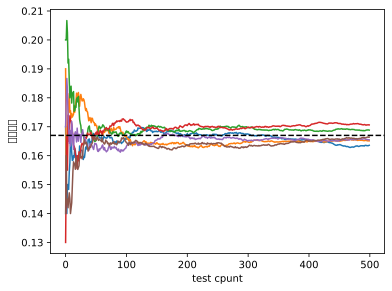

In [9]:
counts = multinomial.Multinomial(100, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('test cpunt')
d2l.plt.gca().set_ylabel('估算概率')
d2l.plt.legend();